In [26]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


X, y_true = make_blobs(n_samples=500, centers=8, n_features=10, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

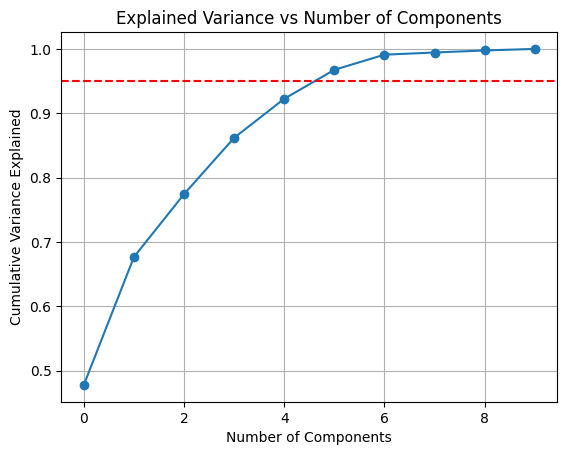

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)

explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_var, marker='o')
plt.axhline(0.95, color='red', linestyle='--')
plt.title("Explained Variance vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()


In [28]:
components_needed = np.argmax(explained_var >= 0.95) + 1
print(f"Components needed to explain >95% variance: {components_needed}")


Components needed to explain >95% variance: 6


In [29]:
from sklearn.cluster import KMeans

k = 8  # we know dataset has 8 centers
kmeans_before = KMeans(n_clusters=k, random_state=42)
labels_before = kmeans_before.fit_predict(X_scaled)

print("Clustering done BEFORE PCA.")


Clustering done BEFORE PCA.


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
pca_reduced = PCA(n_components=components_needed)
X_pca = pca_reduced.fit_transform(X_scaled)

kmeans_after = KMeans(n_clusters=k, random_state=42)
labels_after = kmeans_after.fit_predict(X_pca)

print("Clustering done AFTER PCA.")

Clustering done AFTER PCA.


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


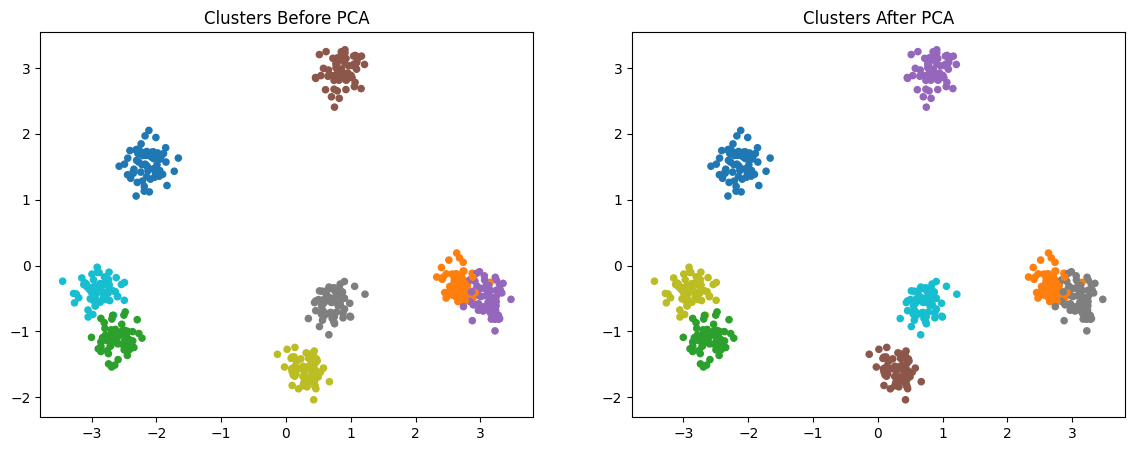

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

proj_before = PCA(n_components=2).fit_transform(X_scaled)
axes[0].scatter(proj_before[:,0], proj_before[:,1], c=labels_before, cmap='tab10', s=20)
axes[0].set_title("Clusters Before PCA")

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_after, cmap='tab10', s=20)
axes[1].set_title("Clusters After PCA")

plt.show()
